# Tools

In [195]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from collections import deque, Counter, namedtuple, OrderedDict
import numpy as np
import pandas as pd
from scipy.stats import rankdata, pearsonr, linregress, spearmanr
import scipy.stats as scs
from scipy.special import comb
import scipy as scpy
import statsmodels.api as sm
from statsmodels.formula.api import ols
import os
import warnings
from IPython.display import display
from itertools import combinations as combs

import loc_utils as lut
import vis_utils as vut
from standards import *

rx = RAWXix()
r = RAWix()

pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)


gcolors = ['#008fd5', '#fc4f30']
colors = ['#65C2A5', '#FC8D62', '#8DA0CB', '#E78AC3']
ncolors = ['#A6D854', '#FFD930', '#E5C494']

glabels = {0: 'IG', 1: 'EG'}
fullglabels = {0: 'IG', 1: 'EG'}

tlabels = OrderedDict({
        1: 'A1',
        2: 'A2',
        3: 'A3',
        4: 'A4'})

LOCAL = '/Users/alexten/Projects/MonsterStudy/output'
DESKTOP = '/Users/alexten/Desktop/'
data_path = '/Users/alexten/Projects/MonsterStudy/data/joint_data.pkl'

lss = OrderedDict(
    [('solid',               (0, ())),
     ('loosely dotted',      (0, (1, 10))),
     ('dotted',              (0, (1, 5))),
     ('densely dotted',      (0, (1, 1))),

     ('loosely dashed',      (0, (5, 10))),
     ('dashed',              (0, (5, 5))),
     ('densely dashed',      (0, (5, 1))),

     ('loosely dashdotted',  (0, (3, 10, 1, 10))),
     ('dashdotted',          (0, (3, 5, 1, 5))),
     ('densely dashdotted',  (0, (3, 1, 1, 1))),

     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))])
    
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Task description

In [ ]:
def strip_axes(ax, *remove_spines):
    ax.tick_params(labelbottom=False, labelleft=False, 
                   bottom=False, left=False)
    if remove_spines:
        positions = np.array('right,top,bottom,left'.split(','))
        for pos in positions[remove_spines]:
            ax.spines[pos].set_visible(False)

            
def task_rules(data_path, figname, save_to=LOCAL, save_as=''):
    cols = ['sid','grp','tid','pc_first']
    df = lut.unpickle(data_path)
    df = df.loc[:, cols]
    df = df.replace({'1_1D': 1, '2_I1D': 2, '3_2D': 3, '4_R': 4, 'F': 0, 'S': 1})
    df['percent_correct'] = df.pc_first * 100
    
    display(df.head())
    
    fig_dict = dict(num=figname, figsize=[5, 5])
    fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, **fig_dict)

    # Shared variables for the plots below
    tpad = 20
    y, x = np.meshgrid(np.arange(6), np.arange(6))
    A, B = 'o', 'x'
    xlab, ylab = 'Feature 1', 'Feature 2'
    labfs = 12
    titfs = 15
    
    # Task structure subplot: 1D
    ax = axes[0, 0]
    ax.set_aspect(1/6)
    strip_axes(ax, [0,1,3])
    ax.scatter(y[0, :3], x[0, :3]+2.25, marker=A, s=80, color=colors[0])
    ax.scatter(y[0, 3:], x[0, 3:]+2.25, marker=B, s=80, color=colors[0])
    ax.set_xlim([-.5, 5.5]); ax.set_ylim([-.5, .5])
    ax.set_xlabel(xlab, fontsize=labfs)
    ax.set_title('A1', color=colors[0], fontsize=titfs, fontweight='bold')
    
    # Task structure subplot: I1D
    ax = axes[0, 1]
    ax.set_aspect(1, 'box')
    strip_axes(ax, [0,1])
    ax.scatter(x[:3], y[:3], marker=A, s=80, color=colors[1])
    ax.scatter(x[3:], y[3:], marker=B, s=80, color=colors[1])
    ax.set_xlim([-.5, 5.5]); ax.set_ylim([-.5, 5.5])
    ax.set_xlabel(xlab, fontsize=labfs); ax.set_ylabel(ylab, fontsize=labfs)
    ax.set_title('A2', color=colors[1], fontsize=titfs, fontweight='bold')
    
    # Task structure subplot: 2D
    ax = axes[1, 0]
    ax.set_aspect(1, 'box')
    strip_axes(ax, [0,1])
    ax.scatter(y[:4, :4], x[:4, :4], marker=A, s=80, color=colors[2])
    ax.scatter(y[4:, 4:], x[4:, 4:], marker=A, s=80, color=colors[2])
    ax.scatter(y[:4, 4:], x[:4, 4:], marker=B, s=80, color=colors[2])
    ax.scatter(y[4:, :4], x[4:, :4], marker=B, s=80, color=colors[2])
    ax.set_xlim([-.5, 5.5]); ax.set_ylim([-.5, 5.5])
    ax.set_xlabel(xlab, fontsize=labfs); ax.set_ylabel(ylab, fontsize=labfs)
    ax.set_title('A3', color=colors[2], fontsize=titfs, fontweight='bold')
    
    # Task structure subplot: R
    ax = axes[1, 1]
    ax.set_aspect(1, 'box')
    strip_axes(ax, [0,1])
    ax.scatter(x, y, marker='$?$', s=80, color=colors[3])
    ax.set_xlim([-.5, 5.5]); ax.set_ylim([-.5, 5.5])
    ax.set_xlabel(xlab, fontsize=labfs); ax.set_ylabel(ylab, fontsize=labfs)
    ax.set_title('A4', color=colors[3], fontsize=titfs, fontweight='bold')
    
    fig.tight_layout()
    if save_as:
        vut.save_it(fig, save_to, figname, save_as=save_as)

if 1:
    task_rules(
        data_path = 'data/long3.pkl',
        figname = 'task_rules',
        save_to = DESKTOP,
        save_as = 'png'
    )

# Sanity checks (hit rates)

## Familiarization stage

In [ ]:
def mixed_design_LM(df):
    df['groups'] = 0                                                                                           

    fml = 'pc_first ~ 1'                                                                                  
    vcf = {'subject': '0 + C(sid)', 
           'within': '0 + C(tid)',                              
           'between': '0 + C(grp)'}                                                                      
    model = sm.MixedLM.from_formula('pc_first ~ C(tid)*C(grp)', 
               groups='sid', data=df)                             
    return model.fit() 


def strip_axes(ax, remove_spines=False):
    ax.tick_params(labelbottom=False, labelleft=False, 
                   bottom=False, left=False)
    if remove_spines:
        for pos in 'left,right,top,bottom'.split(','):
            ax.spines[pos].set_visible(False)

            
def sanity_check1(data_path, figname, save_to=LOCAL, save_as=''):
    cols = ['sid','grp','tid','pc_first']
    df = lut.unpickle(data_path)
    df = df.loc[:, cols]
    df = df.replace({'1_1D': 1, '2_I1D': 2, '3_2D': 3, '4_R': 4, 'F': 0, 'S': 1})
    df['percent_correct'] = df.pc_first * 100
    
    lm = mixed_design_LM(df)
    display(lm.summary())
    display(df.head())
    
    fig = plt.figure(figname, figsize=[5,5])
    
    ax = vut.pretty(fig.add_subplot(111))
    palet = sns.set_palette(sns.color_palette(gcolors))
    sns.boxplot(x='tid', y='percent_correct', hue='grp', data=df,
                saturation=1, palette=palet, ax=ax)
    
    props = {'connectionstyle': 'bar',
             'arrowstyle': '-',
             'patchA': None, 'patchB': None,
             'shrinkA': 10, 'shrinkB': 10,
             'linewidth': 2}
    bh, pad = 100, .025
    for i in range(3):
        ax.text(x=i+.5, y=bh+15, s='***', fontsize=15, ha='center', va='top')
        ax.annotate('', xy=(i+pad, bh), xytext=(i+1-pad, bh), xycoords='data', 
                ha='center', va='top', arrowprops=props)

    ax.set_ylim(0, 115)
    ax.set_xlim(-.5, 3.8)
    ax.set_xlabel('Learning activity', fontsize=15)
    ax.set_ylabel('% correct', fontsize=20)
    ax.set_xticklabels(['A1', 'A2', 'A3', 'A4'], fontsize=15, fontweight='bold')
    for xt, c in zip(ax.get_xticklabels(), colors):
        xt.set_color(c)
    
    ax.legend_.remove()
    ax.text(3.5, 100, glabels[0], va='top', ha='left', 
            fontsize=15, fontweight='bold', color=gcolors[0])
    ax.text(3.5, 80, glabels[1], va='bottom', ha='left', 
            fontsize=15, fontweight='bold', color=gcolors[1])
#     red = mpl.lines.Line2D([0],[0], color=gcolors[0], lw=5, label=fullglabels[0])
#     blue = mpl.lines.Line2D([0],[0], color=gcolors[1], lw=5, label=fullglabels[1])
#     leg = ax.legend(handles=[red, blue], fontsize=15, ncol=1,
#                     bbox_to_anchor=[1.05, .5], loc='center left')
#     vut.color_legend(leg)
    
    fig.tight_layout()
    if save_as:
        vut.save_it(fig, save_to, figname, save_as=save_as)

if 1:
    plt.close()
    sanity_check1(
        data_path = 'data/long3.pkl',
        figname = 'sanity_check_1alt',
        save_to = DESKTOP,
        save_as = ''
    )

## Free-play stage

,sid,grp,trial,t0,cor,st1,st2,st3,st4,loc_pc1,loc_pc2,loc_pc3,loc_pc4,ntm
0,0,0,0,4,0,0,0,0,1,0.933333,0.733333,0.2,0.733333,3
1,0,0,1,4,1,0,0,0,1,0.933333,0.733333,0.2,0.733333,3
2,0,0,2,4,1,0,0,0,1,0.933333,0.733333,0.2,0.733333,3
3,0,0,3,4,0,0,0,0,1,0.933333,0.733333,0.2,0.666667,3
4,0,0,4,4,1,0,0,0,1,0.933333,0.733333,0.2,0.733333,3


GRP 0, task 1, 0.8098591549295775
GRP 0, task 2, 0.821917808219178
GRP 0, task 3, 0.7919463087248322
GRP 0, task 4, 0.8055555555555556
GRP 1, task 1, 0.5529411764705883
GRP 1, task 2, 0.7176470588235294
GRP 1, task 3, 0.8439306358381503
GRP 1, task 4, 0.9473684210526315


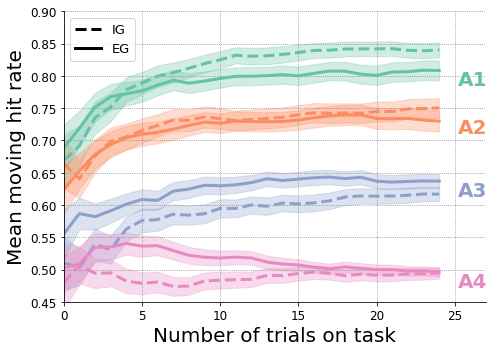

In [120]:
def sanity_check2(data_path, figname, save_to, save_as=None, compress=False, show_raw=True, s=5, m='flat', lim=25):
    cols = 'sid,grp,trial,t0,cor,st1,st2,st3,st4,loc_pc1,loc_pc2,loc_pc3,loc_pc4,ntm'.split(',')
    df = lut.unpickle(data_path)[cols]
#     df = df.loc[df.ntm==3, :]
    display(df.head())
    
    fig = plt.figure(figname, figsize=[7,5])
    
    ax = vut.pretty(fig.add_subplot(111))
    rdata = {'sid': [], 'grp': [], 'tid': [], 'pc1': []}
    for grp in [0, 1]:
        for tid in [1,2,3,4]:
            data = df.loc[(df.grp==grp) & (df.t0==tid)]
            nbs = data.sid.unique().size
            
            a = np.zeros([nbs, 250])
            b = np.full([nbs, 250], np.nan)
            for i, (_, sdf) in enumerate(data.groupby('sid')):
                nbt = sdf.shape[0]
                a[i, :nbt] = 1
                cor = sdf.cor.values
                b[i, :nbt] = np.cumsum(cor) / np.arange(1, nbt+1)
                rdata['sid'].append(sdf.sid.values[0])
                rdata['grp'].append(grp)
                rdata['tid'].append(tid)
                rdata['pc1'].append(np.nanmean(b[i, :25]))
            
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                a = np.mean(a, axis=0)
                print('GRP {}, task {}, {}'.format(grp, tid, a[25]))
                err = scs.sem(b, axis=0, nan_policy='omit')
                b = np.nanmean(b, axis=0)
                ax.plot(b[:lim], color=colors[tid-1], label='{} / {}'.format(fullglabels[grp], tlabels[tid]),
                        ls = '--' if not grp else '-', lw=3)
                ax.fill_between(np.arange(250)[:lim], (b+err)[:lim], (b-err)[:lim], 
                                color=colors[tid-1], alpha=.3)
            if grp:
                ax.text(25.2, b[lim], tlabels[tid], color=colors[tid-1], fontsize=20, fontweight='bold', va='top')

        ax.set_xlabel('Number of trials on task', fontsize=20)
        ax.set_ylabel('Mean moving hit rate', fontsize=20)
        ax.set_ylim(.45,.90)
        ax.set_xlim(0, 27)
    solid = mpl.lines.Line2D([0],[0], color='k', lw=3, label=fullglabels[1])
    dashed = mpl.lines.Line2D([0],[0], color='k', lw=3, label=fullglabels[0], ls='--')
#     ax.legend(handles=[dashed, solid], fontsize=16, bbox_to_anchor=[1.02, 1], loc='upper left')
    ax.legend(handles=[dashed, solid], fontsize=13)
#     ax.text(2,.86, 'Free play', fontsize=25, fontweight='bold', va='bottom')
    fig.tight_layout()
#     rdata = pd.DataFrame(rdata).sort_values(by='sid')
#     rdata.to_csv('pipeline_data/clear_data/long_ntm_data_freeplay.csv')
    if save_as:
        vut.save_it(fig, save_to, figname, save_as=save_as, compress=False)

        
if 1:
    sanity_check2(
        data_path = 'data/ntm_data_freeplay.pkl',
        figname = 'sanity_check_2', 
        save_to = DESKTOP, 
        save_as = '')

# Task selection

## Task choices

st1  st2  st3  st4
grp sid                    
0   0      0   16  178   56
    1     74   29   97   50
    2    118   33    0   99
    3     45   19   84  102
    4    126    4   80   40

SAVED TO: /Users/alexten/Desktop//selection_proportions.png


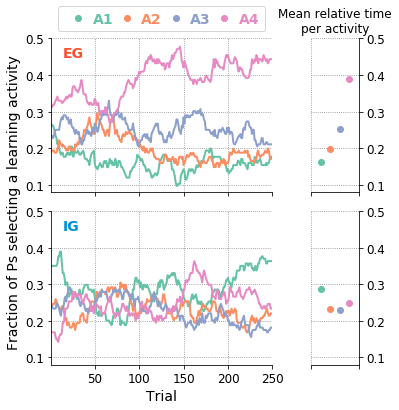

In [111]:
def task_choices_over_time(data_path, figname, save_to, save_as=None, compress=False):
    cols = ['st1','st2','st3','st4']
    df = lut.unpickle(data_path)
    _, Ns = np.unique(df.grp.values, return_counts=True)
    Ns = Ns//250
    df = df.set_index(['grp','sid','trial']).loc[:, cols]
    counts_per_sid = df.groupby(['grp','sid']).sum()
    display(counts_per_sid.head())
    counts_per_trial = df.groupby(['grp','trial']).sum()
    grp_means = df.groupby(['grp']).mean()
    grp_sems = df.groupby(['grp']).sem()

    fig = plt.figure(figname, figsize=vut.metric(150, 150))
    gs = mpl.gridspec.GridSpec(2, 4)
    
    # Ghost axis
    ax = fig.add_subplot(gs[:2, :3])
    ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
    for spine in ax.spines.values(): spine.set_visible(False)
    ax.set_ylabel('Fraction of Ps selecting a learning activity', fontsize=14, labelpad=30)
    
    for i, grp in enumerate([1, 0]):
        # Left panels
        ax = vut.pretty(fig.add_subplot(gs[i, :3]))
        ax.set_xlim(1, 250)
        ax.set_ylim(.08, .5)
        ax.grid(True)
        
        if i:
            ax.set_xlabel('Trial', fontsize=14)
        else:
            ax.tick_params(labelbottom=False)
            handles = [mpl.lines.Line2D([0],[0], color=colors[k], ls='', marker='o', label=tlabels[k+1]) for k in range(4)]
            leg = ax.legend(handles, tlabels.values(), handletextpad=.05,
                            bbox_to_anchor=(0,1,1,0.2), loc='lower left', mode='expand', ncol=4, fontsize=14)
            vut.color_legend(leg)
            
        txt = ax.text(x=.05, y=.95, s=fullglabels[grp],
                      ha='left', va='top', transform = ax.transAxes,
                      color=gcolors[grp], fontweight='bold', fontsize=14)

        for tsk in [1,2,3,4]:
            psel = counts_per_trial.loc[(grp, slice(None)), 'st'+str(tsk)].values.squeeze() / Ns[grp]
            ax.plot(psel, c=colors[tsk-1], label=tlabels[tsk], lw=2)
    
        # Right panels
        ax = fig.add_subplot(gs[i, 3])
        ax.spines['right'].set_visible(True)
        ax.spines['left'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.tick_params(left=False, labelleft=False, right=True, labelright=True, labelbottom=False)
        ax.set_ylim(.08, .5)
        ax.set_xlim(.0, .5)
        ax.grid(True, c='gray', ls=':')
        if not i: ax.set_title('Mean relative time\nper P per activity')
        for j in range(4):
            x = (.1, .2, .3, .4)[j]
            y = grp_means.loc[grp, 'st'+str(j+1)]
            yerr = grp_sems.loc[grp, 'st'+str(j+1)]
#             ax.errorbar(x, y, yerr=yerr, color=colors[j], marker='_',)
            ax.plot(x, y, color=colors[j], marker='o')
    
    fig.tight_layout()
    if save_as:
        vut.save_it(fig, save_to, figname, save_as=save_as, compress=False)


if 1:
    task_choices_over_time(
        data_path = 'data/ntm_data_freeplay.pkl',
        figname = 'selection_proportions', 
        save_to = DESKTOP, 
        save_as = ''
    )

## PC over time

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cor   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     159.1
Date:                Wed, 04 Mar 2020   Prob (F-statistic):           3.05e-72
Time:                        18:59:12   Log-Likelihood:                -1347.8
No. Observations:                 500   AIC:                             2704.
Df Residuals:                     496   BIC:                             2720.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    68.2609      0.457    149.497      0.000      67.364      69.158
C(grp, Treatment(reference=0))[T.1]          -2.9381      0.646     -4.550      0.000      -4.207      -1.669
trial                                         0.0263      0.003      8.337      0.000       0.020       0.032
trial:C(grp, Treatment(reference=0))[T.1]    -0.0284      0.004     -6.358      0.000      -0.037      -0.020
==============================================================================
Omnibus:                        0.151   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.927   Jarque-Bera (JB):                0.191
Skew:                          -0.041   Prob(JB):                        0.909
Kurtosis:                       2.952   Cond. No.                         760.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

grp 0: y = 68.261 + 0.026 x
grp 1: y = 65.323 - 0.002 x


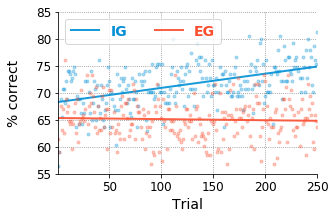

In [117]:
def pc_over_time(data_path, figname, save_to, save_as=None, N_bins=10, standardize=False):
    # Prepare data
    cols = 'sid,grp,ntm,trial,t0,cor'.split(',')
    df = lut.unpickle(data_path)[cols]
    df.loc[:, 'trial'] = df.trial + 1
    
    gdf = df.groupby(['grp','trial'])[['cor']].mean()
    gdf.loc[:, 'cor'] = gdf.cor * 100
    w = 15
    
    lmdf = gdf.reset_index()
    lm = ols('cor ~ trial*C(grp,Treatment(reference=0))', data=lmdf).fit()
    params = lm.params
    display(lm.summary())
    
    # Make figure
    fig = plt.figure(figname, figsize=vut.metric(150, 80))
    gs = mpl.gridspec.GridSpec(1, 4)
    ax = vut.pretty(fig.add_subplot(gs[0, :3]))
    
    for grp in [0, 1]:
        x = np.arange(1,251)
        y = gdf.loc[(grp, slice(None)), :].values.squeeze()
        ax.plot(x, y, color=gcolors[grp], ls='', alpha=.3, marker='.')
        
        x_ = np.array([1,251])
        y_ = lm.predict({'grp': (grp, grp), 'trial': x_})
        ax.plot(x_, y_, color=gcolors[grp], lw=2, alpha=.9, label=fullglabels[grp])
        
        intercept = params[0] + params[1]*grp
        slope = params[2] + params[3]*grp
        pos = int(slope > 0)
        pad = .02
        txt = 'y = {:.3f} {} {:.3f} x'.format(intercept, '-+'[pos], np.abs(slope))
        print('grp {}: {}'.format(grp, txt))
#         t = ax.text(x = 1, y = y_[1]+(pad, -pad)[pos], s = txt, 
#                     ha = 'right', va = ('top','bottom')[pos],
#                     fontsize = 14, color = gcolors[grp])
#         t.set_bbox(dict(facecolor='w', alpha=0.55, edgecolor=gcolors[grp]))

    ax.set_xlabel('Trial', fontsize=14)
    ax.set_ylabel('% correct', fontsize=14, labelpad=15)
    
    leg = ax.legend(fontsize=14, ncol=2)
    vut.color_legend(leg)
    
    ax.set_ylim(55, 85)
    ax.set_xlim(1, 250)
    fig.tight_layout()
    
    if save_as:
        vut.save_it(fig, save_to, figname, save_as=save_as, compress=False)

        
if 1:
    pc_over_time(
        data_path = 'data/ntm_data_freeplay.pkl',
        figname = 'pc_over_time', 
        save_to = DESKTOP, 
        save_as = ''
    )

# Learnability ratings

In [ ]:
def learnability_ratings(data_path, cov, item, norm=False, clip_dpc=True, 
                         figname='untitled', summary=False, save_to=local, save_as=''):
    
    keys = 'lrn,int,comp,time,prog,rule,lrn2'.split(',')
    full = 'learning potential,interest,complexity,subjective time,progress,rule,learning potential'.split(',')
    imap = dict(zip(keys,full))
    
    df = lut.unpickle(data_path) 
    df.replace(dict(tid={'1D': 1, 'I1D': 2, '2D': 3, 'R': 4}), inplace=True)
    df.replace(dict(grp={'F': 0, 'S': 1}), inplace=True)
    df.replace(dict(cnd={'i-': '0_i-', 'i+': '1_i+'}), inplace=True)
    display(df.head(4))
    df.pc_first = 1 - df.pc_first
    n = 'n' if norm else ''
    df.loc[:, 'dpc'] = np.abs(df.pc1015 - df.pc05)
    if clip_dpc: df.loc[df.dpc<0, 'dpc'] = 0
    for tref in [3,2,1,0]:
        print(tlabels[tref+1])
        f = '{}{} ~ (pc_first) * (C(grp) + C(tid, Treatment(reference={})))'.format(n,item,tref)
        results = ols(f, data=df).fit()
        if summary: 
            display(results.summary())
#             if save: 
#                 with open(finloc+'/'+figname+'_{}_model.txt'.format(item), 'w') as tf:
#                     tf.write(results.summary().as_text())
    
    params = results.params
    fig = plt.figure(figname+'_{}-{}'.format(cov,item), figsize=[7.5,6])
    
    ax = vut.pretty(fig.add_subplot(111))
    ax.set_xlabel('Error rate' if cov=='pc' else '{}hange in % correct'.format('Positive c' if clip_dpc else 'C'), 
               fontsize=20)
    ax.set_ylabel('Subjective {}'.format(imap[item]), fontsize=20)
    for ti, tid in enumerate(df.tid.unique()):
        dtsk = df[df.tid==tid]
        meanpc = dtsk.pc_first.mean()
        meandpc = dtsk.dpc.mean()
        meangrp = (dtsk.grp == 'S').sum()/(dtsk.grp == 'S').size
        meancnd = (dtsk.cnd == '1_i+').sum()/(dtsk.cnd == '1_i+').size
        xlims = [-2, 2]
        
        for grp in [0, 1]:
            yhat = results.predict(pd.DataFrame({'pc_first': xlims,
#                                                  'dpc': [meandpc, meandpc],
                                                 'grp': [grp, grp],
                                                 'tid': [tid, tid]}))
            ax.plot(xlims, yhat.values, c=colors[ti], lw=3, label='{} / {}'.format(glabels[grp],tlabels[ti+1]),
                    ls='--' if not grp else '-')

        x = vut.rand_jitter(dtsk.pc_first if cov=='pc' else dtsk.dpc)
        y = dtsk['{}{}'.format(n, item)] if norm else  dtsk['{}{}'.format(n, item)]
        ax.scatter(x = x, y = y, c = colors[ti], alpha=.4, 
                   s=6, zorder=2, label=None)
        
    x = df.pc_first if cov=='pc' else df.dpc
    y = df['{}{}'.format(n, item)] if norm else  df['{}{}'.format(n, item)]
    ax.set_xlim(-.05,.95)
    ax.set_ylim(vut.pad_lims(y))
    
    ax.text(-.02, .7, 'R', color=colors[3], fontsize=20, fontweight='bold', va='bottom')
    ax.text(.86, 2.4, '2D', color=colors[2], fontsize=20, fontweight='bold', va='top')
    ax.text(.87, 5.55, 'I1D', color=colors[1], fontsize=20, fontweight='bold', va='top')
    ax.text(-.02, -.69, '1D', color=colors[0], fontsize=20, fontweight='bold', va='top')
    
    solid = mpl.lines.Line2D([0],[0], color='k', lw=3, label='Strategic')
    dashed = mpl.lines.Line2D([0],[0], color='k', lw=3, label='Free', ls='--')
#     ax.legend(handles=[dashed, solid], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=16)
    ax.legend(handles=[dashed, solid], fontsize=16)
    
    fig.tight_layout()
    
    if save_as: 
        vut.save_it(fig, save_to, figname, save_as=save_as)

    
if 1:
    learnability_ratings(
        data_path = 'data/long3.pkl', 
        cov = 'pc',  
        item = 'lrn', 
        norm = True,
        figname = 'pc_lrn',
        save_to = LOCAL,
        save_as = 'png'
    )

# Learning outcomes

## Mean hit rates

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,sid,grp,pc1,pc2,pc3,pc4,
sid,,,,,,,
0,0,0,93.333333,73.333333,20.0,75.000000,NaN
0,0,0,93.333333,73.333333,20.0,76.470588,NaN
0,0,0,93.333333,73.333333,20.0,77.777778,NaN
0,0,0,93.333333,73.333333,20.0,73.684211,NaN
0,0,0,93.333333,73.333333,20.0,75.000000,NaN


SAVED TO: /Users/alexten/Desktop//outcomes_mean_pc.png


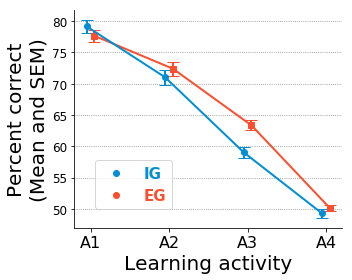

In [155]:
def learning_outcomes_1(data_path, figname, save_to, save_as):
    df = lut.unpickle(data_path).set_index('sid', drop=False)
    tasks = [1,2,3,4]
#     display(df.head())

    cols = 'sid,grp,pc1,pc2,pc3,pc4,'.split(',')
    df = df.loc[df.trial>60, cols]
    df.loc[slice(None), ('pc1','pc2','pc3','pc4')] = df.loc[:, 'pc1':'pc4'] * 100
    display(df.head())
    by_subject = df.groupby(df.index).mean()
    by_group = by_subject.groupby('grp')
    
    group_mean = by_group.mean()
    group_sem = by_group.sem()
       
    fig = plt.figure(figname, figsize=[5,4])    
    ax = vut.pretty(fig.add_subplot(111), 'y')
    for grp in [1, 0]:
        ydata = group_mean.loc[grp, 'pc1':'pc4']
        yerrdata = group_sem.loc[grp, 'pc1':'pc4']

        ax.errorbar(
            x = np.array(tasks)+(0.05 if grp else -0.05),
            y = ydata,
            yerr = yerrdata,
            color = gcolors[grp], 
            label = fullglabels[grp], 
            zorder = 3, 
            capsize = 6,
            lw = 2,
            marker = 's' if grp else 'o')
    
    red = mpl.lines.Line2D([0],[0],    color=gcolors[0], ls='', marker='o', label=fullglabels[0])
    blue = mpl.lines.Line2D([0],[0],   color=gcolors[1], ls='', marker='o', label=fullglabels[1])
    leg = ax.legend(handles=[red, blue], fontsize=15, bbox_to_anchor=[.05,.05], loc='lower left')
    vut.color_legend(leg)
    
    ax.set_ylabel('Percent correct\n(Mean and SEM)', fontsize=20)
    ax.set_xlabel('Learning activity', fontsize=20)
    xTickMarks = [tlabels[tsk] for tsk in tasks]
    ax.set_xticks(tasks)
    xtickNames = ax.set_xticklabels(xTickMarks, fontsize=16)
    
    newdf = pd.wide_to_long(by_subject.loc[:, ('sid', 'grp', 'pc1', 'pc2', 'pc3', 'pc4')], 
                           i='sid', j='tid', stubnames='pc').reset_index().astype('float')

#     display(newdf.sort_values(by='sid').head())
#     Uncomment to view regression results
#     for tid in [1,2,3,4]:
#         print('REFERENCE {}'.format(tid))
#         display(ols('pc ~ C(grp) * C(tid, Treatment({}))'.format(tid), data=newdf).fit().summary())
    
    fig.tight_layout()
    if save_as:
        vut.save_it(fig, save_to, figname, save_as=save_as)


if 1:
    learning_outcomes_1(
        data_path = 'data/trials_data2.pkl', 
        figname='outcomes_mean_pc', 
        save_to = DESKTOP, 
        save_as = 'png'
    )

## Proportions of learners

[array([136, 111,  68,  11]), array([155, 134, 115,  26])]
Group sizes [F, S]: [154, 176]
Task 1D:
[0.8831168831168831, 0.11688311688311688]
[0.8806818181818182, 0.11931818181818182]
Chi-square = 2.7576036866359446, p = 0.09679312359435648

Task I1D:
[0.7207792207792207, 0.2792207792207792]
[0.7613636363636364, 0.23863636363636365]
Chi-square = 3.9715707178393744, p = 0.04627458820546792

Task 2D:
[0.44155844155844154, 0.5584415584415584]
[0.6534090909090909, 0.3465909090909091]
Chi-square = 29.454597291518176, p = 5.72420931995449e-08

Task R:
[0.07142857142857142, 0.9285714285714286]
[0.14772727272727273, 0.8522727272727273]
Chi-square = 8.98051282051282, p = 0.0027287405465365815

SAVED TO: /Users/alexten/Desktop//outcomes_proportions.png


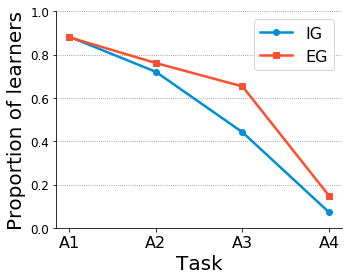

In [158]:
def learning_outcomes_2(data_path, figname, save_to=LOCAL, save_as=''):
    df = lut.unpickle(data_path).set_index('sid', drop=False)

    cols = 'sid,grp,loc_p1,loc_p2,loc_p3,loc_p4,loc_pc1,loc_pc2,loc_pc3,loc_pc4'
    df = df.loc[df.stage==1, cols.split(',')]
    df = df.iloc[:-1, :]
    sids, groups = df.sid.unique(), df.grp.unique()
    tasks = [1,2,3,4]
    
    fig = plt.figure(figname, figsize=[5,4])    
    ax = vut.pretty(fig.add_subplot(1,1,1), 'y')
    
    sizes, freqs = [], []
    for grp in groups:
        gdf = df.loc[df.grp==grp]
        N = gdf.sid.unique().shape[0]
        
        
        learnt = gdf.loc[:, 'loc_pc1':'loc_pc4'] > 12/15
        any_lps = learnt.groupby(learnt.index).any()
        num_any_lps = any_lps.sum(axis=0).values
        label = '{} (N = {})'.format(fullglabels[grp], N)
        ax.plot(num_any_lps/N, color=gcolors[grp], label=fullglabels[grp], zorder=3, lw=2.5,
                marker='s' if grp else 'o')        
        
        sizes.append(N)
        freqs.append(num_any_lps)

    ax.legend(fontsize=16)
    ax.set_ylabel('Proportion of learners', fontsize=20)
    ax.set_xlabel('Task', fontsize=20)
    xTickMarks = [tlabels[tsk] for tsk in tasks]
    ax.set_xticks(np.arange(len(tasks)))
    xtickNames = ax.set_xticklabels(xTickMarks, fontsize=16)
    ax.set_ylim(0,1)
    fig.tight_layout()
    
    print(freqs)
    print('Group sizes [F, S]:', sizes)
    for tsk in tasks:
        print('Task {}:'.format(['1D','I1D','2D','R'][tsk-1]))
        subt0, subt1 = int(freqs[0][tsk-1]), int(freqs[1][tsk-1])
        supt0, supt1 = sizes[0]-subt0, sizes[1]-subt1
        sum0, sum1 = subt0 + supt0, subt1 + supt1
        print([subt0/sum0, supt0/sum0])
        print([subt1/sum1, supt1/sum1])
        chi, p = scs.chisquare(f_obs=[subt0, supt0], f_exp=[subt1, supt1])
        print('Chi-square = {}, p = {}\n'.format(chi, p))
    
    if save_as:
        vut.save_it(fig, save_to, figname, save_as=save_as, compress=False)
        
        
if 1:
    learning_outcomes_2(
        data_path = 'data/trials_data2.pkl', 
        figname = 'outcomes_proportions',
        save_to = DESKTOP, 
        save_as = 'png'
    )

## Mean learning points

In [193]:
def learning_outcomes_3(data_path, omit_nans, figname, save_to, save_as):
    p_str, pc_str = 'loc_p', 'loc_pc'
    
    def get_lps(df, **kwargs):
        arr = df.values
        mask = (arr != 0)
        arr = np.where(mask.any(axis=0), mask.argmax(axis=0), kwargs['invalid_val'])
        return pd.Series(arr, dtype='Int64')
    
    df = lut.unpickle(data_path).set_index(['grp','sid'])
    tasks = [1,2,3,4]
    
    cols = [p_str+str(t) for t in tasks]+[pc_str+str(t) for t in tasks]
    df = df.loc[df.stage==1, cols]
    df = df.iloc[:-1, :]
    
    crit_pc = df.loc[:, pc_str+'1':pc_str+'4'] > 12/15
    crit_pc.columns = tasks[:]
    learnt = crit_pc
    
    by_subject = learnt.groupby(['grp','sid']).apply(get_lps, invalid_val=np.nan if omit_nans else 250)
    by_group = by_subject.groupby('grp', as_index=False)
    
    gcenters = by_group.mean()
    gsems = by_group.sem()
    
    fig = plt.figure(figname, figsize=[5,4])    
    ax = vut.pretty(fig.add_subplot(111), 'y')
    
    inds = np.arange(len(tasks))
    for grp in [0, 1]:
        ax.errorbar(inds+.03 if grp else inds-.03, 
                    gcenters.loc[grp], yerr=gsems.loc[grp], 
                    color=gcolors[grp], label=fullglabels[grp], zorder=3, 
                    lw=1.5, marker='s' if grp else 'o', capsize=4)

    leg = ax.legend(loc='upper left', fontsize=16)    
    vut.color_legend(leg)
    ax.set_ylabel('Learning point\n(mean and SEM)', fontsize=20)
    ax.set_xlabel('Learning activity', fontsize=20)
    xTickMarks = [tlabels[tsk] for tsk in tasks]
    ax.set_xticks(inds)
    xtickNames = ax.set_xticklabels(xTickMarks, fontsize=16)
    ax.set_xlim(-.5, 3.5)
    
    # Display fractions of participants mastering each task in each group
    sizes, freqs = [], []
    for grp in [0, 1]:
        gdf = df.loc[(grp, slice(None)), :]
        N = gdf.index.unique().shape[0]
        learnt = gdf.loc[:, 'loc_pc1':'loc_pc4'] > 12/15
        any_lps = learnt.groupby(learnt.index).any()
        num_any_lps = any_lps.sum(axis=0).values      
        sizes.append(N)
        freqs.append(num_any_lps)
        
    for grp in [0, 1]:
        for i, freq in enumerate(freqs[grp]):
            ax.text(
                x = i, y = [270, 290][grp],
                s = str(round(freq/sizes[grp],2)),
                color=gcolors[grp], fontsize=14, 
                ha='center', va='center',
                fontweight='bold') 
    ax.text(x=-1, y=280, s='Fraction\nmastering', ha='center', va='center', fontsize=12)
    
    # Fit a regression model
    df = by_subject.reset_index().rename(columns={0:1, 1:2, 2:3, 3:4})
    df = pd.melt(df, id_vars=('grp','sid'), value_vars=[1,2,3,4], 
            var_name='tid', value_name='lpoint')
    display(df.head())
    lm = ols('lpoint ~ C(grp)*C(tid)', data=df).fit()
    display(lm.summary())
        
    fig.tight_layout()
    if save_as:
        vut.save_it(fig, save_to, figname, save_as=save_as, compress=False)
    
    
if 1:
    learning_outcomes_3(
        data_path = 'data/trials_data2.pkl',
        omit_nans = False,
        figname = 'outcomes_learning_points',
        save_to = DESKTOP,
        save_as = ''
    )

,grp,sid,tid,lpoint
0,0,0,1,0
1,0,1,1,5
2,0,2,1,35
3,0,3,1,0
4,0,4,1,5


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lpoint   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     103.5
Date:                Sat, 07 Mar 2020   Prob (F-statistic):          1.43e-120
Time:                        18:13:54   Log-Likelihood:                -7724.0
No. Observations:                1320   AIC:                         1.546e+04
Df Residuals:                    1312   BIC:                         1.551e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  63.5000      6.801      9.336      0.000      50.157      76.843
C(grp)[T.1]                11.2670      9.313      1.210      0.227      -7.003      29.537
C(tid)[T.2]                49.6688      9.618      5.164      0.000      30.800      68.538
C(tid)[T.3]               115.8961      9.618     12.049      0.000      97.027     134.765
C(tid)[T.4]               174.1688      9.618     18.108      0.000     155.300     193.038
C(grp)[T.1]:C(tid)[T.2]   -21.6347     13.171     -1.643      0.101     -47.473       4.203
C(grp)[T.1]:C(tid)[T.3]   -43.6006     13.171     -3.310      0.001     -69.439     -17.763
C(grp)[T.1]:C(tid)[T.4]   -18.0552     13.171     -1.371      0.171     -43.893       7.783
==============================================================================
Omnibus:                       24.293   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.132
Skew:                           0.164   Prob(JB):                     0.000191
Kurtosis:                       2.549   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# NTMs by group

[0.03246753 0.21428571 0.42207792 0.33116883]
[0.02840909 0.14772727 0.32386364 0.5       ]
SAVED TO: /Users/alexten/Desktop//ntm_summary.png


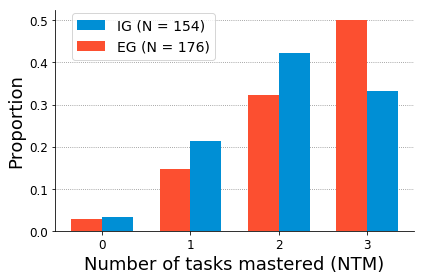

In [159]:
def ntm_by_group(data_path, figname, save_to=LOCAL, save_as=''):
    df = lut.unpickle(data_path)[['sid','grp','ntm']]
    df = df.groupby(['grp','ntm','sid']).head(1).groupby(['grp','ntm']).count().reset_index()
    
    fig = plt.figure(figname, figsize=[6,4])
    ax = vut.pretty(fig.add_subplot(111), 'y')
    
    width = .35
    ind = np.arange(4).astype(int)
    rects = {}
    
    for grp in [0, 1]:
        counts = df.loc[df.grp==grp, 'sid'].values
        total = counts.sum()
        props = counts / total
        shift = width/2 if not grp else -width/2
        rects[grp] = ax.bar(ind + shift, props, width, 
                        label=fullglabels[grp]+' (N = {})'.format(['154','176'][grp]), 
                            color=gcolors[grp], zorder=4)
        print(props)
#     
    
    ax.set_xlabel('Number of tasks mastered (NTM)', fontsize=18)
    ax.set_ylabel('Proportion', fontsize=18)
    
    ax.set_xticks(ind)
    ax.set_xticklabels(ind.astype(str))
    
    fig.legend(bbox_to_anchor=[0.15, .95], loc='upper left', fontsize=14)
    fig.tight_layout()
    
    if save_as: 
        vut.save_it(fig, save_to, figname, save_as=save_as)


if 1:
    ntm_by_group(
        data_path = 'data/ntm_data_freeplay.pkl',
        figname = 'ntm_summary',
        save_to = DESKTOP,
        save_as = 'png'
    )

# Task selection and learning

In [ ]:
def task_selection_and_learning(data_path, figname, save_to=LOCAL, save_as=False):
    
    xstr = 'sc_lep'
    df = lut.unpickle(data_path).sort_values(by=xstr)
    df = df.loc[df.ntm>0, :]
    
    propS = np.sum(df.grp==1) / df.shape[0]
    
    fig = plt.figure(figname, figsize=[7,7.5])
    gs = mpl.gridspec.GridSpec(6, 3)
    
    # Figure (scatter plot and histograms)
    # ====================================
    ax_scat  = vut.pretty(fig.add_subplot(gs[3:, :2]))
    ax_top1  = vut.pretty(fig.add_subplot(gs[0, :2], sharex=ax_scat))
    ax_top2  = vut.pretty(fig.add_subplot(gs[1, :2], sharex=ax_scat))
    ax_top3  = vut.pretty(fig.add_subplot(gs[2, :2], sharex=ax_scat))
    ax_right = vut.pretty(fig.add_subplot(gs[3:, 2], sharey=ax_scat))
    ax_leg   = vut.pretty(fig.add_subplot(gs[2, 2]))

    bins = np.arange(0,1.02,.1)
    labels = {'ntm': ['NTM '+str(i) for i in (0,1,2,3)], 'grp': fullglabels}
    axes_by_ntm = {3: ax_top1, 2: ax_top2, 1: ax_top3}
    for grp in [0, 1]:
        for ntm in [1,2,3]:
            x = df.loc[(df.ntm==ntm) & (df.grp==grp), xstr]
            y = df.loc[(df.ntm==ntm) & (df.grp==grp), 'post']
            ax_scat.scatter(x, y, s=30, alpha=.7, 
                            facecolors=gcolors[ntm-1] if grp else 'w',
                            edgecolors=gcolors[ntm-1])

            rf, _ = np.histogram(x, bins=bins, weights=np.zeros_like(x) + 1. / x.size)
            axes_by_ntm[ntm].plot(bins[:-1]+.05, rf, c=gcolors[ntm-1], lw=2,
                                  ls = '-' if grp else '--',
                                  label='{} / NTM-{}'.format(glabels[grp], ntm))
            axes_by_ntm[ntm].tick_params(labelbottom=False) 

            rf, _ = np.histogram(y, bins=bins, weights=np.zeros_like(y) + 1. / y.size)
            ax_right.plot(rf, bins[:-1]+.05, c=gcolors[ntm-1], lw=2,
                          ls = '-' if grp else '--',
                          label='{} / NTM-{}'.format(glabels[grp], ntm))
            ax_right.tick_params(labelleft=False)
    
    ax_scat.set_xlim(.0, .8)
    ax_scat.set_ylim(0.38, 1.)
    ax_scat.set_xlabel('Average SC', fontsize=14)
    ax_top2.set_ylabel('Relative frequency', fontsize=14)
    ax_scat.set_ylabel('Weighted performance score', fontsize=14)
    
    ax_leg.axis('off')
    solid = mpl.lines.Line2D([0],[0], color='k', lw=2, label=fullglabels[1])
    solid_ = mpl.lines.Line2D([0],[0], color='k', ls='', marker='o', label=fullglabels[1])
    
    dashed = mpl.lines.Line2D([0],[0], color='k', lw=2, label=fullglabels[0], ls='--', dashes=(2, 1))
    dashed_ = mpl.lines.Line2D([0],[0], ls='', marker='o', label=fullglabels[0], markerfacecolor='w', markeredgecolor='k')
    
    blue = mpl.lines.Line2D([0],[0], color=gcolors[0], lw=2, label='NTM-1')
    blue_ = mpl.lines.Line2D([0],[0], color=gcolors[0], ls='', marker='o', label='NTM-1')
    
    red = mpl.lines.Line2D([0],[0], color=gcolors[1], lw=2, label='NTM-2')
    red_ = mpl.lines.Line2D([0],[0], color=gcolors[1], ls='', marker='o', label='NTM-1')
    
    yellow = mpl.lines.Line2D([0],[0], color=gcolors[2], lw=2, label='NTM-3')
    yellow_ = mpl.lines.Line2D([0],[0], color=gcolors[2], ls='', marker='o', label='NTM-1')
    
    ax_leg.legend([(blue, blue_), (red, red_), (yellow, yellow_), (dashed, dashed_), (solid, solid_)], 
                  ['NTM-1', 'NTM-2', 'NTM-3', fullglabels[0], fullglabels[1]],
                  bbox_to_anchor=(0, 0), loc='lower left', fontsize=12,
                  handler_map={tuple: mpl.legend_handler.HandlerTuple(ndivide=None)})
    
    ax_right.set_xlabel('Relative frequency', fontsize=14)
    
#     ax.legend(bbox_to_anchor=(0,1,1,0.2), loc='lower left', mode='expand', ncol=3, fontsize=15)
    
    # Model
    # ====================================
    qreg = ols('post ~ (pre + sc_lep + np.power(sc_lep, 2) + grp)', data=df).fit()
    display(qreg.summary())
    x = np.linspace(0,1,100)
#     y = qreg.predict({'sc_lep':x, 'pre':np.full_like(x, df.pre.mean())})
    y_hat = qreg.get_prediction({'sc_lep':x, 
                                 'pre':np.full_like(x, df.pre.mean()),
                                 'grp':np.full_like(x, propS)
                                }).summary_frame()
    display(y_hat.head())
    alpha = .7
    ax_scat.plot(x, y_hat['mean'], c='k', alpha=alpha)
    ax_scat.plot(x, y_hat['mean_ci_lower'], c='k', lw=1, ls='--', alpha=alpha)
    ax_scat.plot(x, y_hat['mean_ci_upper'], c='k', lw=1, ls='--', alpha=alpha)
    
    fig.subplots_adjust(hspace=.2, wspace=.2)
    if save_as:
        vut.save_it(fig, save_to, figname=figname, save_as=save_as, compress=False, dpi=100)
    
        
if 1:
    task_selection_and_learning(
        data_path = 'data/lpreds_data.pkl', 
        figname = 'ucurve', 
        save_to = DESKTOP,
        save_as = 'png')

# Fitted parameters

In [ ]:
def params_distributions(data_path, figname, save_to=LOCAL, save_as=''):
    # Calculate parameter stats
    arr = lut.unpickle(data_path)
    best = np.nanargmin(arr[:, :, 3], axis=0)
    arr = arr[best, np.arange(320), :]
    
    data_dict = {'sid': [], 'grp': [], 'ntm': [], 'loss': [], 
                 'aic': [], 'aic_0': [], 'aic_diff': [],
                 'alpha': [], 'beta': [], 'tau': []}

    fdf = pd.DataFrame(data=arr, columns=data_dict.keys())
    good_fit = (fdf.aic_diff>=2)# & (np.abs(fdf.alpha) <=5) & (np.abs(fdf.beta) <=5)
    print('{} / {} = {}'.format(np.sum(good_fit),fdf.shape[0],np.sum(good_fit)/fdf.shape[0]))
    fdf = fdf.loc[good_fit]
    # fdf.loc[fdf.ntm<=2, 'ntm'] = 1

    gfdf = fdf.groupby(['grp','ntm']).mean().drop(columns=['sid'])
    gfdf_se = fdf.groupby(['grp','ntm']).sem().drop(columns=['sid'])

    display(fdf.groupby(['grp']).mean().drop(columns=['sid','ntm']))
    display(fdf.groupby(['ntm']).mean().drop(columns=['sid','grp']))
    display(gfdf)

    # ================================

    fig = plt.figure('Estimation', figsize=[6, 5])
    gs = mpl.gridspec.GridSpec(3, 3)

    # Figure (scatter plot and histograms)
    # ====================================
    ax = vut.pretty(fig.add_subplot(gs[1:, :2]))
    ax2 = vut.pretty(fig.add_subplot(gs[0, :2], sharex=ax))
    ax3 = vut.pretty(fig.add_subplot(gs[1:, 2], sharey=ax))
    ax_leg = vut.pretty(fig.add_subplot(gs[0, 2]))

    bins = np.linspace(-3,3,15)
    # labels = {'ntm': ['NTM '+str(i) for i in (0,1,2,3)], 'grp': fullglabels}
    for grp in [0, 1]:
        for ntm in [1, 2, 3]:
            filt = (fdf.grp==grp) & (fdf.ntm==ntm) #& (fdf.alpha<15)
    #         (~((fdf.alpha-fdf.alpha.mean()).abs() > 2*fdf.alpha.std()))# & \
    #         (~((fdf.beta-fdf.beta.mean()).abs() > 2*fdf.beta.std())) 

            x = fdf.loc[filt, 'alpha']
            y = fdf.loc[filt, 'beta']
            print(grp, ntm, pearsonr(x,y))
            ax.scatter(x, y, s=10, alpha=1, facecolors=gcolors[ntm-1] if grp else 'w', edgecolors=gcolors[ntm-1],  
                       label='NTM-{}'.format(ntm) if grp else None)

            rf, _ = np.histogram(x, bins=bins, weights=np.zeros_like(x) + 1. / x.size)
            ax2.plot(bins[:-1]+.05, rf, c=gcolors[ntm-1], lw=1.5, alpha=.8,
                     ls = '-' if grp else '--',
                     label='{} / NTM-{}'.format(glabels[grp], ntm))
            ax2.axvline(x.mean(), ymin=0, ymax=.2, color=gcolors[ntm-1], lw=2,
                        ls = '-' if grp else '--',)

            rf, _ = np.histogram(y, bins=bins, weights=np.zeros_like(y) + 1. / y.size)
            ax3.plot(rf, bins[:-1]+.05, c=gcolors[ntm-1], lw=1.5, alpha=.8,
                     ls = '-' if grp else '--',
                     label='{} / NTM-{}'.format(glabels[grp], ntm))
            ax3.axhline(y.mean(), xmin=0, xmax=.2, color=gcolors[ntm-1], lw=2,
                            ls = '-' if grp else '--',)

        ax.set_xlim(-2.5, 2.5); ax.set_ylim(-2.5, 2.5)
        ax.set_xlabel(r'$\beta$', fontsize=14)
        ax2.set_ylabel('Relative\nfrequency', fontsize=14)
        ax.set_ylabel(r'$\alpha$', fontsize=14)

        ax_leg.axis('off')
        solid = mpl.lines.Line2D([0],[0], color='k', lw=2, label='Strategic')
        solid_ = mpl.lines.Line2D([0],[0], color='k', ls='', marker='o', label='Strategic')

        dashed = mpl.lines.Line2D([0],[0], color='k', lw=2, label='Free', ls='--', dashes=(2, 1))
        dashed_ = mpl.lines.Line2D([0],[0], ls='', marker='o', label='Free', markerfacecolor='w', markeredgecolor='k')

        blue = mpl.lines.Line2D([0],[0], color=gcolors[0], lw=2, label='NTM-1')
        blue_ = mpl.lines.Line2D([0],[0], color=gcolors[0], ls='', marker='o', label='NTM-1')

        red = mpl.lines.Line2D([0],[0], color=gcolors[1], lw=2, label='NTM-2')
        red_ = mpl.lines.Line2D([0],[0], color=gcolors[1], ls='', marker='o', label='NTM-1')

        yellow = mpl.lines.Line2D([0],[0], color=gcolors[2], lw=2, label='NTM-3')
        yellow_ = mpl.lines.Line2D([0],[0], color=gcolors[2], ls='', marker='o', label='NTM-1')

        ax_leg.legend([(blue, blue_), (red, red_), (yellow, yellow_), (dashed, dashed_), (solid, solid_)], 
                      ['NTM-1', 'NTM-2', 'NTM-3', 'Free', 'Strategic'],
                      bbox_to_anchor=(-.1, 1.5), loc='upper left', fontsize=12,
                      handler_map={tuple: mpl.legend_handler.HandlerTuple(ndivide=None)})

        ax3.set_xlabel('Relative\nfrequency', fontsize=14)

    fig.tight_layout()
    if save_as:
        vut.save_it(fig, save_to, figname=figname, save_as=save_as, compress=False, dpi=100)


if 1:
    params_distributions(
        data_path = 'data/mult_seeds_data_small_bounds.pkl',
        figname = 'fitted_params',
        save_to = LOCAL,
        save_as = ''
    )

# footer

## This was 4.1Task choices over time

In [83]:
def task_choices_over_time(data_path, figname, save_to, save_as=None, compress=False):
    mdata = lut.unpickle(data_path)['main']

    sids, groups, conds, tasks = lut.get_unique(mdata, [r.ix('sid'), 
                                                        r.ix('group'),
                                                        r.ix('cond'),
                                                        r.ix('cat')])

    freeplay = lut.get_mask(mdata, {r.ix('stage'): 1})
    mdata = mdata[freeplay, :]
    mdata[:, r.ix('trial')] -= 60
    first250 = lut.get_mask(mdata, {r.ix('trial'): 250}, '<=')
    mdata = mdata[first250, :]
    
    fig = plt.figure(figname, figsize=[5, 5])
    gs = mpl.gridspec.GridSpec(2, 4)
    
    for grp in []:
        gmask = lut.get_mask(mdata, {r.ix('group'): grp})
        gsids = lut.get_unique(mdata[gmask, :], r.ix('sid'))
        
        
        ax = vut.pretty(fig.add_subplot(gs[grp, :3]))
        txt = ax.text(x=.05, y=.95, s=fullglabels[grp],
                      ha='left', va='top', transform = ax.transAxes,
                      color=gcolors[grp], fontweight='bold')
        txt.set_fontsize(25)
        psels = []
        for i, grp in enumerate([0, 1]):
            tmask = np.array([mdata[gmask, r.ix('cat')] == tsk]).reshape([gsids.size, -1])
            psel = np.sum(tmask, axis=0) / gsids.size
            psels.append(psel)
            ax.plot(psel, c=colors[i], label=tlabels[tsk], lw=3)
            
            ax.set_xlim(1,250)
            ax.set_ylim(.08,.5)
            ax.grid(True)
        
        if grp:
            ax.set_xlabel('Trial', fontsize=20)
        else:
            ax.tick_params(labelbottom=False)
            ax.legend(bbox_to_anchor=(0,1,1,0.2), loc='lower left', mode='expand', ncol=4, fontsize=15)
        ax.set_ylabel('Selection proportion', fontsize=20)
        
        
    fig.tight_layout()
    if save_as:
        vut.save_it(fig, save_to, figname+'_'+glabels[grp], save_as=save_as, compress=False)


if 1:
    task_choices_over_time(
        data_path = 'data/joint_data.pkl',
        figname = 'selection_proportions', 
        save_to = DESKTOP, 
        save_as = ''
    )

<Figure size 360x360 with 0 Axes>

## Task choices across free play

In [ ]:
def task_choices_across_freeplay(data_path, figname='proportion_of_trials_on_tasks', save_to=DESKTOP, save_as=''):
    cols = ['st1','st2','st3','st4']
    df = lut.unpickle(data_path)
    df = df.set_index(['grp','sid','trial']).loc[:, cols]
    counts = df.groupby(['grp','sid']).sum()
    props = (counts / 250).reset_index()
    props = pd.wide_to_long(props, stubnames='st', i=['grp','sid'], j='activity').reset_index()
    
    counts['explorer'] = np.all(counts >= 25, axis=1)
    display(counts.reset_index().groupby('grp').mean())
    display(props.head())
    
    fig = plt.figure(figname, figsize=[6, 5])
    ax = vut.pretty(fig.add_subplot(111), 'y')
    
    sns.boxplot(x='activity', y='st', hue='grp', data=props, whis=1.5,
                saturation=1, palette=gcolors, ax=ax)    

    xTickMarks = [tlabels[tsk] for tsk in [1,2,3,4]]
    ax.set_xticks([0,1,2,3])
    xtickNames = ax.set_xticklabels(xTickMarks)
    
    ax.set_ylabel('Proportion of trials on activity', fontsize=14)
    ax.set_xlabel('Learning activity', fontsize=14)
    ax.set_ylim(-.02, 1)
            
    red = mpl.lines.Line2D([0],[0],    color=gcolors[0], ls='', marker='o', label=fullglabels[0])
    blue = mpl.lines.Line2D([0],[0],   color=gcolors[1], ls='', marker='o', label=fullglabels[1])
    leg = ax.legend(handles=[red, blue], fontsize=15, loc='lower left',
                    bbox_to_anchor=[.5, .9], ncol=2)
    for i, (line, text) in enumerate(zip(leg.get_lines(), leg.get_texts())):
        text.set_color(line.get_color())
        text.set_fontweight('bold')    
    
    fig.tight_layout()
    if save_as:
        vut.save_it(fig, save_to, figname, save_as=save_as, compress=False)


if 1:
    task_choices_across_freeplay(
        data_path = 'data/ntm_data_freeplay.pkl',
        figname = 'proportion_of_trials_on_tasks', 
        save_to = DESKTOP,
        save_as = ''
    )